**Installing the required library.**

In [1]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=1e773d0ed26fad1f24136f5509a459f9983ec4e9453fbe1f94c83f9fa7232266
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


**Load the required libraries.**

In [2]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import glob
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt

In [3]:
# importing logging because data frame was giving warnings
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
all_files = glob.glob(f"/content/gdrive/My Drive/Recordings" + '/*.wav')
print(len(all_files))

17379


**MFCC Function**

In [6]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [7]:
# making a datafrmae using the the list of files and also adding the class of each file
dataSet = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'class'])
for i in all_files:
    sr, audio = read(i)
    features = get_MFCC(audio, sr)
    c = -1
    if "en-" in i or "en_" in i:
        c = 0
    if "ur-" in i or "ur_" in i:
        c = 1
    if "ue-" in i or "ue_" in i:
        c = 2
    if c != -1:
        dataSet = dataSet.append({'x1': features[0], 'x2': features[1], 'x3': features[2], 'x4': features[3], 'x5': features[4], 'x6': features[5], 'x7': features[6], 'x8': features[7], 'x9': features[8], 'x10': features[9], 'x11': features[10], 'x12': features[11], 'x13': features[12], 'class': c}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


In [8]:
dataSet

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,15.420616,-1.106523,-3.854466,3.577854,-1.386421,-6.628898,-11.955851,-7.753118,-2.687607,-10.298835,6.917660,-7.851081,-6.799251,1.0
1,15.420616,-1.106523,-3.854466,3.577854,-1.386421,-6.628898,-11.955851,-7.753118,-2.687607,-10.298835,6.917660,-7.851081,-6.799251,1.0
2,15.643362,-0.229043,-3.130625,-1.625388,-0.224217,0.416528,-6.852738,-9.243361,1.486968,-4.285490,16.338480,-4.966220,-10.124564,1.0
3,15.643362,-0.229043,-3.130625,-1.625388,-0.224217,0.416528,-6.852738,-9.243361,1.486968,-4.285490,16.338480,-4.966220,-10.124564,1.0
4,15.643362,-0.229043,-3.130625,-1.625388,-0.224217,0.416528,-6.852738,-9.243361,1.486968,-4.285490,16.338480,-4.966220,-10.124564,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12.792125,-7.911104,-11.009741,5.922262,-8.259737,-1.410583,-15.554617,-15.372664,-2.530352,-5.918442,-2.580511,-3.292523,-3.056571,1.0
17375,13.720188,-11.402813,-11.325706,3.983313,-7.455342,-3.671909,-15.862445,-15.744310,0.200963,3.158964,2.918506,-4.339300,-7.697900,1.0
17376,13.512430,-6.669017,-9.888639,4.662860,-14.662137,-5.392384,-14.575046,-12.648510,3.306230,-4.056787,4.018101,1.277110,-9.139446,1.0
17377,13.507047,-9.687303,-8.127189,3.346995,-12.033723,-6.361372,-16.998146,-12.991586,3.368223,-4.726273,2.225458,3.776183,-9.071092,1.0


In [9]:
df0 = dataSet[dataSet['class'] == 0]
df1 = dataSet[dataSet['class'] == 1]
df2 = dataSet[dataSet['class'] == 2]

In [10]:
train0 = df0.sample(frac=0.8, random_state=42)
test0 = df0.drop(train0.index)
train1 = df1.sample(frac=0.8, random_state=42)
test1 = df1.drop(train1.index)
train2 = df2.sample(frac=0.8, random_state=42)
test2 = df2.drop(train2.index)

In [11]:
train = pd.concat([train0, train1, train2], axis=0)
test = pd.concat([test0, test1, test2], axis=0)
train = train.sample(frac=1)
test = test.sample(frac=1)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [12]:
train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,16.201308,1.319581,-5.111306,-4.071243,-14.515750,-19.028973,-22.240286,-12.248209,-5.027565,4.323473,-8.683477,-10.609682,-0.506709,0.0
1,13.441872,-0.514658,-10.127126,6.703724,-13.970037,-20.386062,-18.149803,-14.569009,0.255921,-10.511090,0.352601,0.186471,-12.314925,1.0
2,14.348592,-6.387910,-7.370324,-2.644048,-11.235419,-2.473244,-12.501751,-5.645054,-10.881376,-10.312623,-14.454989,-1.209222,-10.936381,2.0
3,14.331497,-0.331736,-3.411798,-2.259657,-0.192586,-1.159961,-7.106523,-8.310903,0.791856,-7.731586,4.655036,-5.285241,-7.684324,1.0
4,14.621738,-3.173315,1.708869,-3.473783,-3.284796,-9.777825,-4.875456,-14.482121,1.345331,-13.462105,-4.742579,-11.623953,-8.353573,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13899,14.357939,7.543944,-1.088752,7.757970,5.044227,-16.222761,1.868213,-10.737932,-14.250531,1.361290,-3.285875,-0.737387,-7.590883,2.0
13900,15.994212,-5.502135,-2.019694,-1.548316,-4.560579,-10.889679,-15.777394,-10.040295,4.137918,-17.707570,-8.296197,2.467190,-4.218726,2.0
13901,15.384082,12.272051,-19.196599,-6.630442,-18.708450,-21.427024,-4.560739,-3.217198,-10.171993,-10.525011,-6.001002,-2.820961,-6.420600,2.0
13902,12.892739,-6.686172,2.322560,-1.767230,-5.619896,0.013195,-11.138115,-6.586972,-11.443729,-9.001641,-5.755665,-9.320735,-8.058829,2.0


In [13]:
test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,12.568621,-3.182065,0.289685,4.674709,-6.915367,-1.581370,-6.730985,-8.704468,-6.640114,-8.035935,-12.208996,-2.752123,-8.269605,2.0
1,15.920498,-4.644190,-3.915210,-4.115700,-4.551232,-12.280932,-18.406129,-8.101645,4.152856,-14.897206,-9.717921,-0.595087,-2.200104,2.0
2,12.152084,-4.334252,0.166728,9.373140,-3.881491,-9.449358,-9.934307,-8.936363,-12.808627,12.151831,-7.061753,2.329170,-11.791472,2.0
3,14.352157,-3.209276,6.846610,-11.668230,-2.827499,-1.861888,-17.208527,3.961933,-3.565307,-6.282839,-6.702186,-6.877130,-0.105685,0.0
4,15.724611,-9.154384,-3.141408,-6.210158,-8.251933,-6.306669,-13.302607,-3.596716,-4.011056,-3.417552,-0.300093,-1.782279,-8.262789,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,14.178583,-0.647307,-13.514870,8.727378,-27.218727,-15.233047,-15.932683,-7.823875,-12.382528,2.735011,-9.083495,2.116776,-3.573112,2.0
3471,10.707688,-6.362740,-1.641224,-1.949204,-7.217769,-2.114914,-5.031869,-2.418242,-3.821109,-2.913611,-8.416610,-1.269287,-7.298061,2.0
3472,8.085683,-0.842275,-0.897021,-10.806420,-21.086045,-19.411597,-2.762494,-2.220293,-6.966706,-10.014067,-6.921709,-11.469490,-6.847378,2.0
3473,12.551941,-3.021710,-4.420894,6.479005,-5.789734,-27.700398,-18.004232,-7.178766,-8.826483,-13.549135,-12.161819,-3.763448,-7.888786,2.0


**Loading the required libraries**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [20]:
X = dataSet.drop(['class'], axis=1).to_numpy()
y = dataSet['class']

In [21]:
X.shape

(17379, 13)

In [22]:
y.shape

(17379,)

In [23]:
X_train = train.drop(['class'], axis=1).to_numpy()
y_train = train['class']
X_test = test.drop(['class'], axis=1).to_numpy()
y_test = test['class']

#**Part 1**

In [ ]:
accuracy_list = []
f1_list = []
for i in np.arange(10):
  knn = KNeighborsClassifier(n_neighbors=i+1)
  accuracy_list.append((cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')).mean())
  f1_list.append((cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro')).mean())

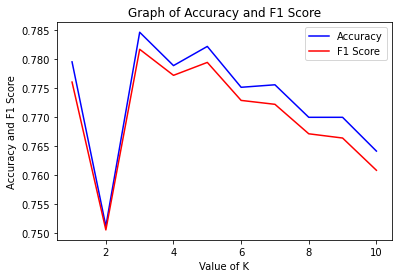

In [ ]:
# plotting Accuracy and F1 Score
plt.plot(np.arange(1, 11), accuracy_list, "-b", label="Accuracy")
plt.plot(np.arange(1, 11), f1_list, "-r", label="F1 Score")
plt.title('Graph of Accuracy and F1 Score')
plt.xlabel('Value of K')
plt.ylabel('Accuracy and F1 Score')
plt.legend(loc="upper right")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_cv = cross_validate(knn, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)

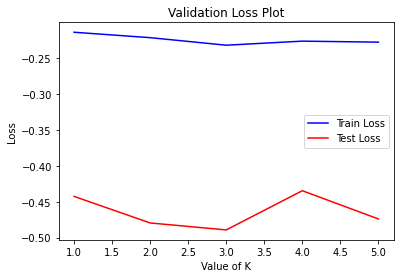

In [ ]:
plt.plot(np.arange(1, 6), knn_cv['train_score'], "-b", label="Train Loss")
plt.plot(np.arange(1, 6), knn_cv['test_score'], "-r", label="Test Loss")
plt.title('Validation Loss Plot')
plt.xlabel('Value of K')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

In [ ]:
bagging_knn = BaggingClassifier(knn, n_estimators=1000)
bagging_knn.fit(X_train,y_train)
y_pred = bagging_knn.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100)

Accuracy: 81.92805755395683


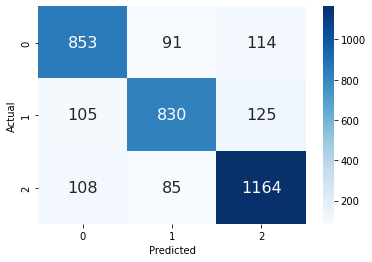

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap="Blues", annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
cr = classification_report(y_test,y_pred)
print('Classification Report:\n', cr)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      1058
         1.0       0.83      0.78      0.80      1060
         2.0       0.83      0.86      0.84      1357

    accuracy                           0.82      3475
   macro avg       0.82      0.82      0.82      3475
weighted avg       0.82      0.82      0.82      3475



#**Part 2**

In [ ]:
s = svm.SVC(kernel='rbf',gamma = 0.01, C = 10)
score = cross_val_score(s, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

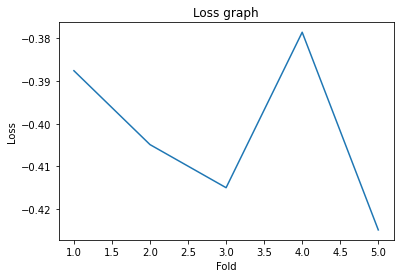

In [ ]:
# import sklearn
import numpy as np
# sorted(sklearn.metrics.SCORERS.keys())
x = np.arange(1,len(score)+1,1)
plt.plot(x,score)
plt.title('Loss graph')
plt.xlabel('Fold')
plt.ylabel('Loss')
# plt.legend(loc="upper right")
plt.show()

In [ ]:
s = svm.SVC(kernel='rbf',gamma = 0.01,C = 10)
s.fit(X_train, y_train)
y_pred = s.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100)

Accuracy: 82.53237410071942


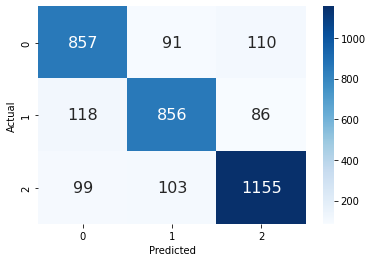

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap="Blues", annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
cr = classification_report(y_test,y_pred)
print('Classification Report:\n', cr)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      1058
         1.0       0.82      0.81      0.81      1060
         2.0       0.85      0.85      0.85      1357

    accuracy                           0.83      3475
   macro avg       0.82      0.82      0.82      3475
weighted avg       0.83      0.83      0.83      3475



#**Part 3**

In [24]:
nn_model = MLPClassifier(hidden_layer_sizes=([1500,1000,500,250,120,50,20]), random_state=42, max_iter = 10000, activation='relu')

In [ ]:
bagging_nn = BaggingClassifier(nn_model)
bagging_nn.fit(X_train, y_train)

In [26]:
y_pred = bagging_nn.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100)

Accuracy: 79.22302158273381


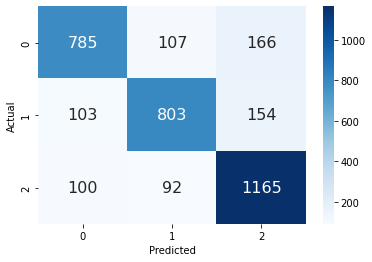

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap="Blues", annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [29]:
cr = classification_report(y_test,y_pred)
print('Classification Report:\n', cr)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.77      1058
         1.0       0.80      0.76      0.78      1060
         2.0       0.78      0.86      0.82      1357

    accuracy                           0.79      3475
   macro avg       0.79      0.79      0.79      3475
weighted avg       0.79      0.79      0.79      3475

